# Project: Investigating TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected the TMDb movie database. The data contains information about 10866 movies. The data has 21 columns. Some of the important attributes associated with each movie are popularity, budget, revenue, cast, director, genre, release_date, vote_average, release_year, adjusted revenue and adjusted budget.

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import operator
from datetime import datetime as dt

Some of the questions I will be looking to answer are:
#### 1. What attributes are associated with highest grossing (revenue) movies. (Like genre, ratings, popularity etc.)
#### 2. How has genre popularity changed over the years.

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# loading data
movie_data = pd.read_csv('tmdb-movies.csv')

In [3]:
# looking at the data
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I will first remove columns which are not relevant to the analysis.  
This will include homepage, tagline, overview, keywords

In [4]:
# removing irrelevant columns
movie_data.drop(['homepage','tagline','overview','keywords'], axis = 1, inplace=True)

In [5]:
# inspecting data
movie_data.shape

(10866, 17)

In [6]:
# checking data types for each column
movie_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
# looking at descriptive statistics of numerical columns in the data
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# Checking for duplicates
sum(movie_data.duplicated())

1

We see that there is 1 duplicate in the data  
Now we are going to find the duplicate entry

In [9]:
# duplicate entry
movie_data[movie_data.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Data Cleaning

In [10]:
# removing duplicate entry
movie_data.drop_duplicates(inplace=True)

In [11]:
# checking to see duplicates are removed
sum(movie_data.duplicated())

0

In [12]:
# checking for missing values
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   director              10821 non-null  object 
 8   runtime               10865 non-null  int64  
 9   genres                10842 non-null  object 
 10  production_companies  9835 non-null   object 
 11  release_date          10865 non-null  object 
 12  vote_count            10865 non-null  int64  
 13  vote_average          10865 non-null  float64
 14  release_year          10865 non-null  int64  
 15  budget_adj         

We observe that production_companies, genres, director and cast columns have missing values.  
Since only genres is the column which is relevant to our analysis, we will remove the records with no genres from our analysis.  
Also, this seems acceptable as the number of records with no genres is very low (23).

In [13]:
# removing movie records with no genre
movie_data.dropna(subset=['genres'], inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Attributes associated with high revenue movies

The first question is to determine attributes of highest grossing movies by adjusted revenue.  
Taking revenue_adj as the dependent variable and popularity, vote_average and genres as independent variables.

##### popularity

In [14]:
# correlation between revenue_adj and popularity
movie_data['revenue_adj'].corr(movie_data['popularity'])

0.6089640182116849

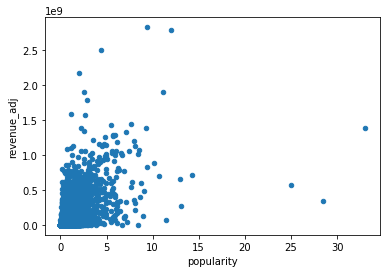

In [15]:
# scatter plot showing correlation between revenue_adj and popularity
movie_data.plot('popularity', 'revenue_adj', kind = 'scatter')

As is visible from the plot and the correlation value, there is a positive correlation between movie popularity and it's revenue. Hence, we can say that movies with higher revenue are generally more popular. However, the correlation is not very strong.

##### Vote_average

In [16]:
# correlation between revenue_adj and avg rating
movie_data['revenue_adj'].corr(movie_data['vote_average'])

0.1938360582805572

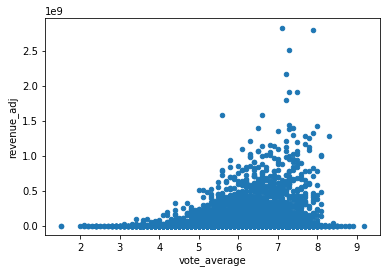

In [17]:
# scatter plot showing correlation between revenue_adj and vote_average
movie_data.plot('vote_average', 'revenue_adj', kind = 'scatter')

In this case, although we have a positive value for correlation between revenue_adj and rating(vote_average), the correlation is very small. So, we cannot say that higher grossing movies generally have higher ratings.

##### Genres

To find which movie genres are associated with the highest grossing movies, I will take the top 100 movies by revenue and see which genre has the most occurances.

In [18]:
# selecting movies with highest adjusted revenue
top_grossing = movie_data.sort_values('revenue_adj',ascending=False).head(100)

In [19]:
top_grossing.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09


In [20]:
# number of unique genre values
len(top_grossing['genres'].unique())

72

we can see that there are 72 different genres in the 100 films. This may be due to the fact that multiple genres are combined together. To make the analysis much better, I will try to count each occurence of a single genre and identify the most occuring genres.

In [21]:
# converting genre column to list
genre_list = top_grossing['genres'].tolist()
# splitting genre column separated by '|'
genre_list = [genre.split('|') for genre in genre_list]
# forming final genre list
genre_list = [item for sublist in genre_list for item in sublist]

In [22]:
# forming a dataframe of all genres
genre_df = pd.DataFrame(genre_list, columns=['genre'])
genre_df

,genre
0,Action
1,Adventure
2,Fantasy
3,Science Fiction
4,Adventure
...,...
316,Action
317,Adventure
318,Fantasy
319,Drama


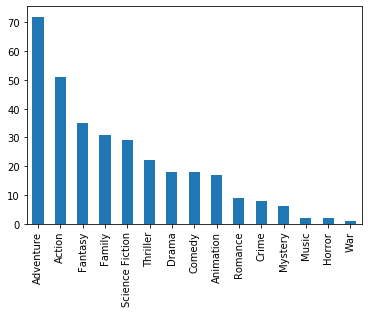

In [23]:
# forming bar graph for number of occurrences of each genre sorted in descending order
genre_df.genre.value_counts().plot(kind = 'bar')

Among the top 100 grossing films, more than 70 films have an Adventure theme. The next most revenue grossing genres are action and fantasy.

### Research Question 2: Most popular genres year-over-year

Now, I will try to determine which genres have been most popular over the years.
Since multiple genres are associated with the movies, while calculating average popuarity for each genre, I will consider all the movies where that genre occurs in the genres column.

In [24]:
# Getting a list of all the genres from movie data
all_genres = movie_data['genres'].tolist()
all_genres = [genre.split('|') for genre in all_genres]
all_genres = [item for sublist in all_genres for item in sublist]
# getting all unique genres
genre_set = set(all_genres)
all_genres = list(genre_set)

In [25]:
all_genres

['Animation',
 'Documentary',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'Action',
 'War',
 'Romance',
 'Music',
 'Foreign',
 'Crime',
 'Thriller',
 'Horror',
 'Comedy',
 'Mystery',
 'TV Movie',
 'Western',
 'Drama',
 'Family',
 'History']

In [26]:
# list of all movie years
movie_year = movie_data['release_year'].unique().tolist()

In [27]:
# sorting movie years
movie_year.sort()

In [28]:
# initialising dataframe that will contain most popular genre for each year
yoy_genre_popularity = pd.DataFrame(columns=['Genre','Popularity'])

In [29]:
import warnings
warnings.filterwarnings('ignore')
# going over each year
for yr in movie_year:
    movie_subset = movie_data[movie_data['release_year'] == yr] # taking subset movies for each year
    pop_dict = {'Animation':[],'War':[],'Science Fiction':[],'Romance':[],'Thriller':[],'Western':[],'Action':[],
           'History':[],'Horror':[],'Documentary':[],'Music':[],'Fantasy':[],'Adventure':[],'Mystery':[],'Drama':[],
           'Family':[],'TV Movie':[],'Crime':[],'Foreign':[],'Comedy':[]} # dictionary for popularity values for each genre
    # for each genre for a particular movie, the popularity value is added to the associated key in the dictionary
    for index,row in movie_subset.iterrows():
        for gen in row['genres'].split('|'):
            pop_dict[gen].append(row['popularity'])    
    avg_dict = {} # dictionary for average popularity values for each genre
    for k,v in pop_dict.items():
        avg_dict[k] = np.mean(v)
    v = list(avg_dict.values())
    k = list(avg_dict.keys())
    max_gen_list = [k[v.index(np.nanmax(v))], round(np.nanmax(v),2)] # extracting key and value for maximum popularity
    yoy_genre_popularity.loc[len(yoy_genre_popularity)] = max_gen_list # appending genre with highest avg. popularity to dataframe

In [30]:
yoy_genre_popularity

,Genre,Popularity
0,Thriller,0.81
1,Animation,2.63
2,Adventure,0.94
3,Animation,2.18
4,War,0.93
5,Music,0.97
6,Animation,0.59
7,Animation,1.35
8,Mystery,1.52
9,Crime,0.95


In [31]:
# converting year values to string for trimming and plotting
year_str = [str(i) for i in movie_year]
year_str = [i[2:] for i in year_str]

In [32]:
# setting index as year numbers
yoy_genre_popularity.index = year_str

In [33]:
# adding trimmed years as column for plotting
yoy_genre_popularity['Year'] = year_str

In [34]:
# num column added to help in plotting
yoy_genre_popularity['num'] = list(range(0,56))

In [37]:
yoy_genre_popularity.head()

,Genre,Popularity,Year,num
60,Thriller,0.81,60,0
61,Animation,2.63,61,1
62,Adventure,0.94,62,2
63,Animation,2.18,63,3
64,War,0.93,64,4


In [40]:
# Most popular genres occurrences over the years
yoy_genre_popularity['Genre'].value_counts()

Adventure          14
Animation          10
Fantasy             9
Crime               5
Action              3
War                 3
Science Fiction     2
Family              2
Mystery             2
Western             2
Music               2
Thriller            1
History             1
Name: Genre, dtype: int64

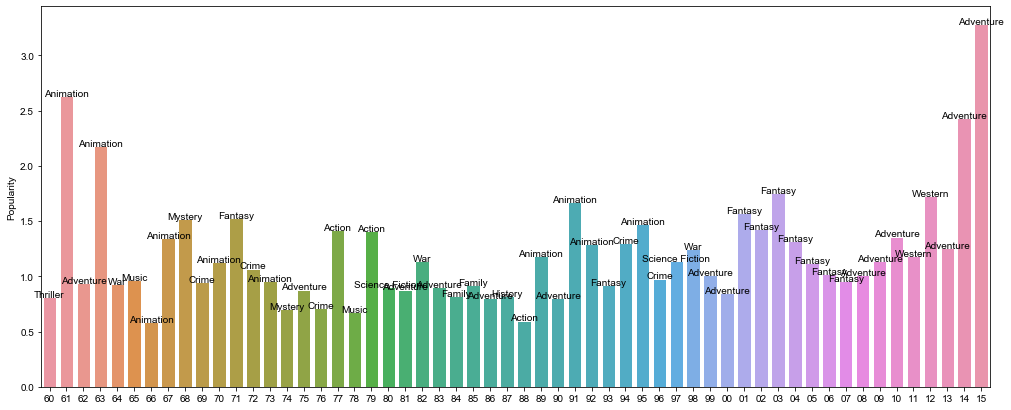

In [36]:
# bar plot showing most popular genre every year
fig_dims = (17, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('darkgrid')
graph1 = sns.barplot(x = yoy_genre_popularity.index, y = 'Popularity', data = yoy_genre_popularity,
                     ax = ax, order = yoy_genre_popularity.index)
# adding genre labels
for index, row in yoy_genre_popularity.iterrows():
    graph1.text(row.num,row.Popularity,s = row.Genre, color='black', ha="center")

<a id='conclusions'></a>
## Conclusions

#### Attributes of high revenue movies

I found a position correlation between popularity and adjusted revenue. Although the correlation is not very significant (0.608), we can say that movies with higher revenue generally tend to be more popular.

There was no significant correlation between rating (vote_avg) and adjusted revenue. 

In terms of genres, I found that in the top 100 movies with most revenue, more that 70 had an adventure theme. 'Action' is the 2nd most common genre in the top 100 movies.

#### Year-over-year popularity of genres

As can be seen from the graph, there has been a wide diversity of most popular genres over the years. Adventure and Animation have been most popular in more years that any other genre. With animation being more popular in the first 8 years of the data (1960-1967), there is a wide variety of genres thereafter till 1998. Since 1999 or around the start of the new millennium, there have been only 3 different genres which have been most popular of the next 16 years. These are Adventure, Fantasy and Western.